In [166]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.widgets import Cursor
from matplotlib.backend_bases import MouseEvent

In [47]:
def replace_code(df):
    df=df.apply(lambda x:URBAN_ATLAS_LAND_USE.get(x,x))
    return df

In [48]:
URBAN_ATLAS_LAND_USE={
    '11100': 'Continuous Urban Fabric (S.L. > 80%)',
    '11210': 'Discontinuous Dense Urban Fabric (S.L. : 50% - 80%)',
    '11220': 'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)',
    '11230': 'Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)',
    '11240': 'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)',
    '11300': 'Isolated Structures',
    '12100': 'Industrial, commercial, public, military and private units',
    '12210': 'Fast transit roads and associated land',
    '12220': 'Other roads and associated land',
    '12230': 'Railways and associated land',
    '12300': 'Port areas',
    '12400': 'Airports',
    '13100': 'Mineral extraction and dump sites',
    '13300': 'Construction sites',
    '13400': 'Land without current use',
    '14100': 'Green urban areas',
    '14200': 'Sports and leisure facilities',
    '21000': 'Arable land (annual crops)',
    '22000': 'Permanent crops (vineyards, fruit trees, olive groves)',
    '23000': 'Pastures',
    '24000': 'Complex and mixed cultivation patterns',
    '25000': 'Orchards at the fringe of urban classes',
    '31000': 'Forests',
    '32000': 'Herbaceous vegetation associations (natural grassland, moors...)',
    '33000': 'Open spaces with little or no vegetations (beaches, dunes, bare rocks, glaciers)',
    '40000': 'Wetland',
    '50000': 'Water bodies'}

## Ungrouped features


In [83]:
path="/home/ana/code/zilikons/demeter/raw_data/berlin_with_features.json"
features=gpd.read_file(path)
features.head(3)

,veg,roads,water,height_resid,height_nonresid,land_use_code,land_use_area,population,y,log_y,geometry
0,165,0,0,30,0,11220,95051.225653,90.136093,0.2,-1.609438,"POLYGON ((13.64540 52.34009, 13.64686 52.34005..."
1,181,0,0,39,0,11220,26392.319278,90.136093,0.2,-1.609438,"POLYGON ((13.64686 52.34005, 13.64833 52.34000..."
2,195,0,0,35,0,11220,95051.225653,44.143646,0.2,-1.609438,"POLYGON ((13.64547 52.34099, 13.64694 52.34094..."


In [84]:
data_sorted=features.sort_values(by=["y"])

In [85]:
data_sorted

,veg,roads,water,height_resid,height_nonresid,land_use_code,land_use_area,population,y,log_y,geometry
0,165,0,0,30,0,11220,95051.225653,90.136093,0.2,-1.609438,"POLYGON ((13.64540 52.34009, 13.64686 52.34005..."
44329,142,0,0,168,0,11220,18420.455962,70.737915,0.2,-1.609438,"POLYGON ((13.60415 52.51948, 13.60562 52.51943..."
44330,204,0,0,90,0,11220,18420.455962,88.998367,0.2,-1.609438,"POLYGON ((13.60562 52.51943, 13.60709 52.51939..."
44331,174,0,0,123,0,11210,20285.927989,93.634590,0.2,-1.609438,"POLYGON ((13.60717 52.52028, 13.60864 52.52024..."
44333,202,0,0,105,0,11220,14798.429110,71.790314,0.2,-1.609438,"POLYGON ((13.60864 52.52024, 13.61011 52.52020..."
...,...,...,...,...,...,...,...,...,...,...,...
52908,0,0,0,0,0,14100,281567.264287,0.000000,13118.0,9.481741,"POLYGON ((13.54001 52.54749, 13.54149 52.54744..."
21776,215,0,0,54,36,50000,43133.664634,52.009567,13871.0,9.537556,"POLYGON ((13.41350 52.45762, 13.41497 52.45758..."
1523,0,0,0,0,0,14100,480251.509004,15.217043,17769.0,9.785211,"POLYGON ((13.36797 52.40135, 13.36944 52.40131..."
13042,180,0,37,0,0,50000,81154.305521,0.000000,44130.0,10.694895,"POLYGON ((13.41750 52.43322, 13.41897 52.43318..."


In [86]:
data_sorted["land_use_code"]=replace_code(data_sorted["land_use_code"])
data_sorted.head(4) 

,veg,roads,water,height_resid,height_nonresid,land_use_code,land_use_area,population,y,log_y,geometry
0,165,0,0,30,0,Discontinuous Medium Density Urban Fabric (S.L...,95051.225653,90.136093,0.2,-1.609438,"POLYGON ((13.64540 52.34009, 13.64686 52.34005..."
44329,142,0,0,168,0,Discontinuous Medium Density Urban Fabric (S.L...,18420.455962,70.737915,0.2,-1.609438,"POLYGON ((13.60415 52.51948, 13.60562 52.51943..."
44330,204,0,0,90,0,Discontinuous Medium Density Urban Fabric (S.L...,18420.455962,88.998367,0.2,-1.609438,"POLYGON ((13.60562 52.51943, 13.60709 52.51939..."
44331,174,0,0,123,0,Discontinuous Dense Urban Fabric (S.L. : 50% -...,20285.927989,93.634590,0.2,-1.609438,"POLYGON ((13.60717 52.52028, 13.60864 52.52024..."


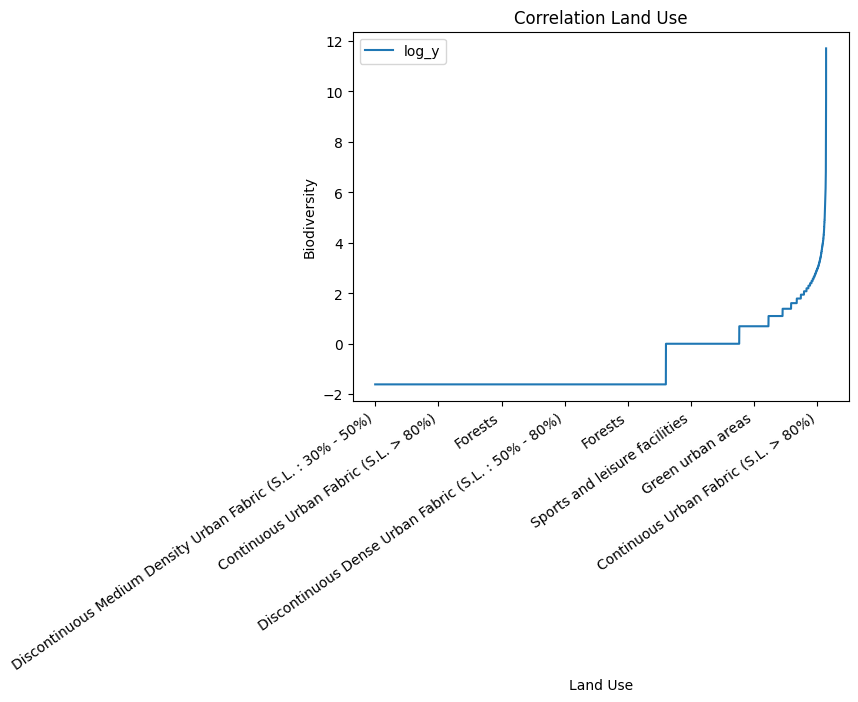

In [88]:
ax=data_sorted.plot(kind="line", x="land_use_code", y="log_y", xlabel="Land Use", ylabel="Biodiversity")
plt.title('Correlation Land Use')
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=35, horizontalalignment='right')

## Grouped features

In [89]:
data_group_geometry=features.dissolve(by='land_use_code')
data_group_geometry=data_group_geometry.reset_index()
data_group_geometry.head(1)

,land_use_code,geometry,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,log_y
0,11100,"MULTIPOLYGON (((13.22688 52.42325, 13.22695 52...",63,0,0,45,174,5065.503377,91.82811,0.2,-1.609438


## Sorted by 'y'

In [90]:
data_geometry_sorted=data_group_geometry.sort_values(by=["y"])

In [91]:
data_geometry_sorted.head(2)

,land_use_code,geometry,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,log_y
0,11100,"MULTIPOLYGON (((13.22688 52.42325, 13.22695 52...",63,0,0,45,174,5065.503377,91.82811,0.2,-1.609438
21,32000,"MULTIPOLYGON (((13.18199 52.43346, 13.18193 52...",0,0,0,0,0,61293.784139,0.00000,0.2,-1.609438


In [94]:
data_geometry_sorted["land_use_code"]=replace_code(data_geometry_sorted["land_use_code"])
data_geometry_sorted

,land_use_code,geometry,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,log_y
0,Continuous Urban Fabric (S.L. > 80%),"MULTIPOLYGON (((13.22688 52.42325, 13.22695 52...",63,0,0,45,174,5.065503e+03,91.828110,0.2,-1.609438
21,Herbaceous vegetation associations (natural gr...,"MULTIPOLYGON (((13.18199 52.43346, 13.18193 52...",0,0,0,0,0,6.129378e+04,0.000000,0.2,-1.609438
20,Forests,"MULTIPOLYGON (((13.12752 52.41241, 13.12746 52...",24,0,0,6,0,2.897093e+04,26.480499,0.2,-1.609438
19,Complex and mixed cultivation patterns,"POLYGON ((13.29631 52.46632, 13.29638 52.46722...",176,0,0,93,30,6.869367e+04,25.241102,0.2,-1.609438
17,Arable land (annual crops),"MULTIPOLYGON (((13.12829 52.40250, 13.12976 52...",0,0,0,0,0,6.326322e+04,55.236443,0.2,-1.609438
16,Sports and leisure facilities,"MULTIPOLYGON (((13.12567 52.40707, 13.12420 52...",126,0,0,35,0,2.763058e+04,0.170658,0.2,-1.609438
15,Green urban areas,"MULTIPOLYGON (((13.12427 52.40800, 13.12433 52...",110,0,0,38,0,9.855317e+03,39.478981,0.2,-1.609438
14,Land without current use,"MULTIPOLYGON (((13.32147 52.40896, 13.32153 52...",0,0,0,0,0,6.899848e+03,51.595730,0.2,-1.609438
13,Construction sites,"MULTIPOLYGON (((13.39510 52.39069, 13.39363 52...",154,0,0,114,0,1.101691e+05,86.580711,0.2,-1.609438
11,Airports,"POLYGON ((13.25723 52.55554, 13.25729 52.55644...",69,0,0,96,0,4.203326e+06,37.806129,0.2,-1.609438


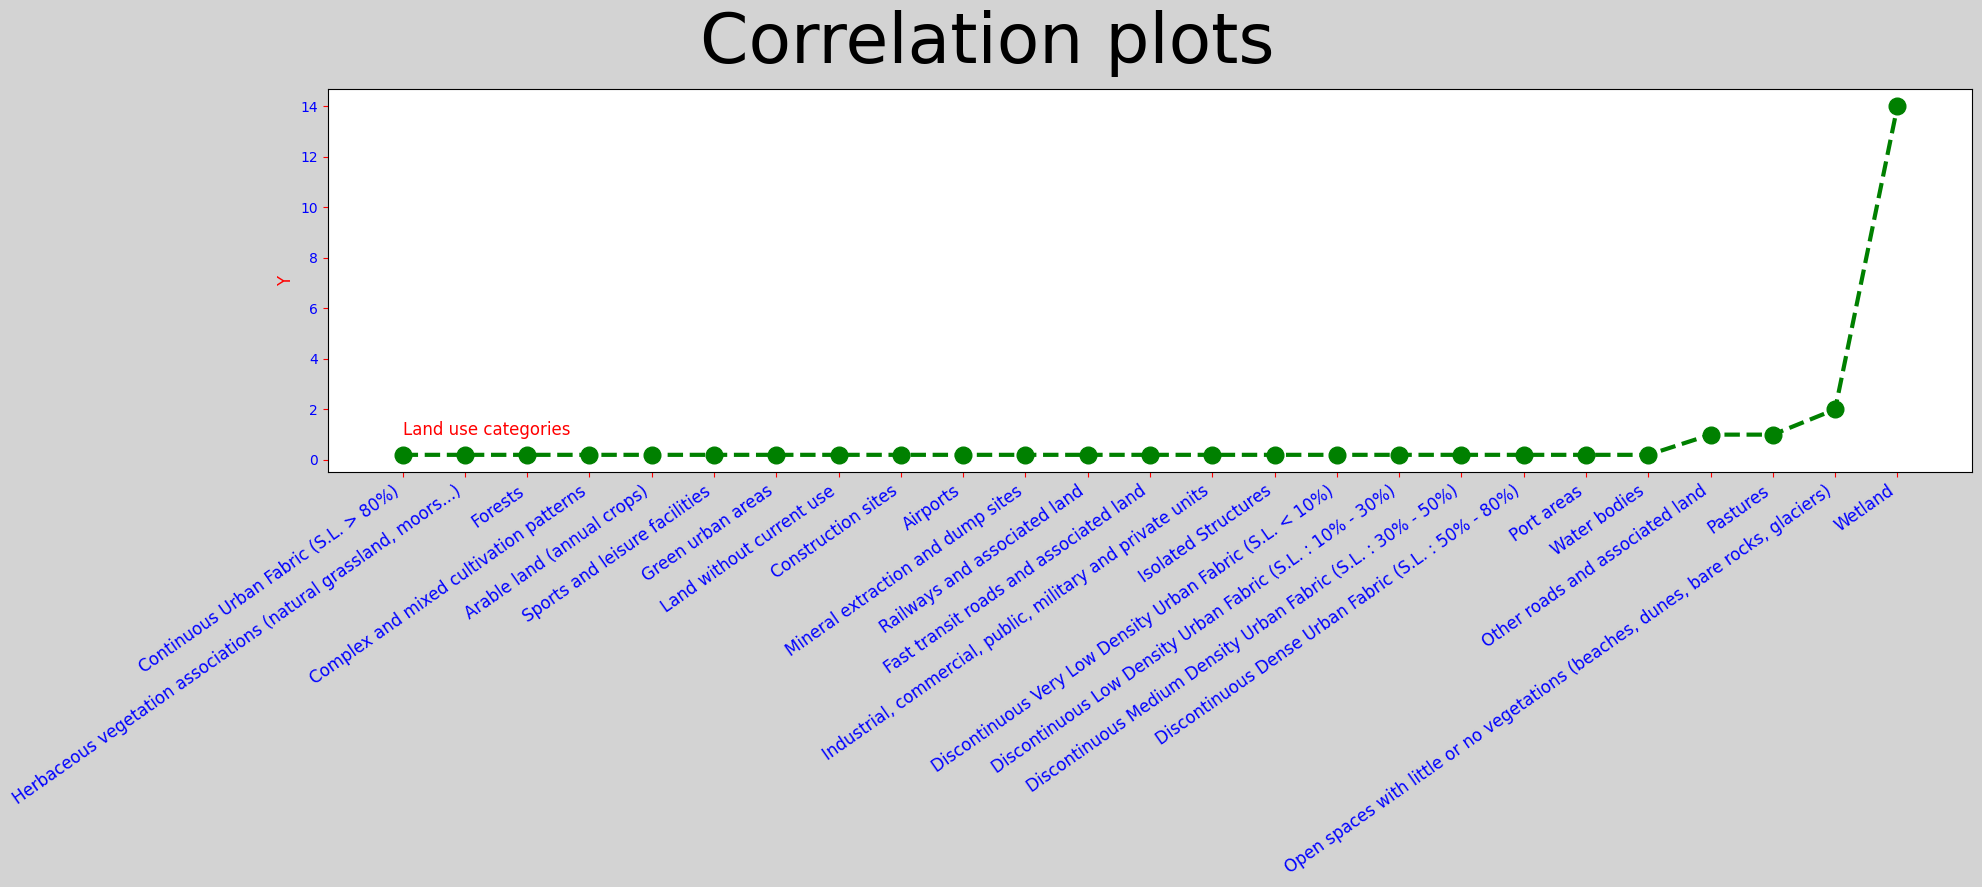

In [309]:
def plot_correlation(y):
    
    fig, ax=plt.subplots(figsize=(20,9), facecolor='lightgray',layout='tight')
    ax.plot(data_geometry_sorted["land_use_code"],y,color='green', marker='o', linestyle='dashed',
     linewidth=3, markersize=12)
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=35, ha='right',fontsize=12)
    
    ax.set_xlim(auto=True)
    ax.set_ylim(auto=True)

    ax.tick_params(axis='x', color='r', labelcolor='b')
    ax.tick_params(axis='y', color='r', labelcolor='b')
    
    ylabel=y.name.capitalize()
    ax.set_ylabel(ylabel,  fontsize = "large",color="r")
    
    l1 = np.array((0, 1))
    ax.text(*l1,"Land use categories",fontsize="large", color="red")

    fig.suptitle('Correlation plots', fontsize=50)
    return plt.show()
plot_correlation(data_geometry_sorted["y"])   

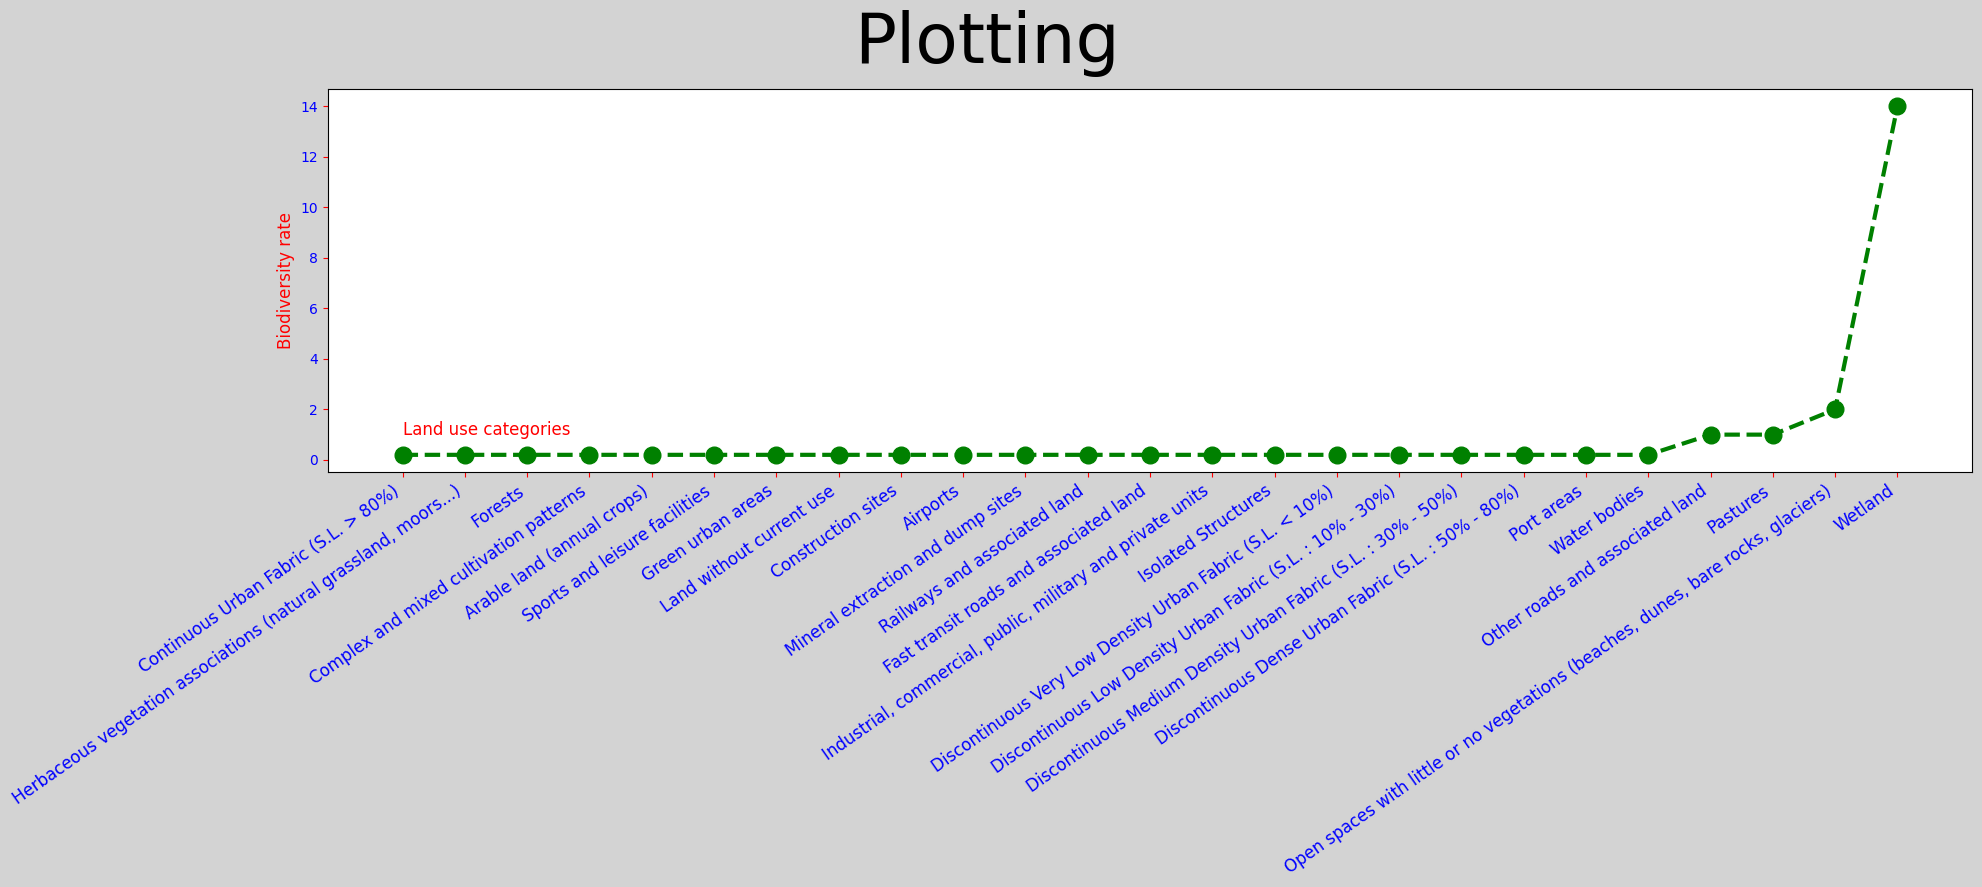

In [243]:
from matplotlib.widgets import Cursor

fig, ax=plt.subplots(figsize=(20,9), facecolor='lightgray',layout='tight')
ax.plot(data_geometry_sorted["land_use_code"],data_geometry_sorted["y"],color='green', marker='o', linestyle='dashed',
     linewidth=3, markersize=12)
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=35, horizontalalignment='right',fontsize=12)
    
ax.set_xlim(auto=True)
ax.set_ylim(auto=True)

ax.tick_params(axis='x', color='r', labelcolor='b')
ax.tick_params(axis='y', color='r', labelcolor='b')

ax.set_ylabel("Biodiversity rate",  fontsize = "large",color="r")
l1 = np.array((0, 1))
ax.text(*l1,"Land use categories",fontsize="large", color="red")
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

fig.suptitle('Plotting', fontsize=50)
plt.show()


In [267]:
def one_hot_encoder(series):
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(sparse = False)
    ohe.fit(series) 
    data_geometry_sorted[ohe.get_feature_names_out()] = ohe.transform(series)
    data_group_geometry_hot=data_geometry_sorted
    return data_group_geometry_hot

In [295]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
ohe.fit(data_geometry_sorted[["land_use_code"]]) 

# Display the detected categories
#print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")
data_geometry_sorted[ohe.get_feature_names_out()] = ohe.transform(data_geometry_sorted[["land_use_code"]])
data_group_geometry_hot=data_geometry_sorted
data_group_geometry_hot.head()

/home/ana/.pyenv/versions/3.10.6/envs/demeter/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,land_use_code,geometry,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,...,land_use_code_Land without current use,land_use_code_Mineral extraction and dump sites,"land_use_code_Open spaces with little or no vegetations (beaches, dunes, bare rocks, glaciers)",land_use_code_Other roads and associated land,land_use_code_Pastures,land_use_code_Port areas,land_use_code_Railways and associated land,land_use_code_Sports and leisure facilities,land_use_code_Water bodies,land_use_code_Wetland
0,Continuous Urban Fabric (S.L. > 80%),"MULTIPOLYGON (((13.22688 52.42325, 13.22695 52...",63,0,0,45,174,5065.503377,91.828110,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,Herbaceous vegetation associations (natural gr...,"MULTIPOLYGON (((13.18199 52.43346, 13.18193 52...",0,0,0,0,0,61293.784139,0.000000,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,Forests,"MULTIPOLYGON (((13.12752 52.41241, 13.12746 52...",24,0,0,6,0,28970.932974,26.480499,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Complex and mixed cultivation patterns,"POLYGON ((13.29631 52.46632, 13.29638 52.46722...",176,0,0,93,30,68693.668349,25.241102,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,Arable land (annual crops),"MULTIPOLYGON (((13.12829 52.40250, 13.12976 52...",0,0,0,0,0,63263.221958,55.236443,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/tmp/ipykernel_1723/4056487945.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data_group_geometry_hot.corr(method="spearman", min_periods=1)


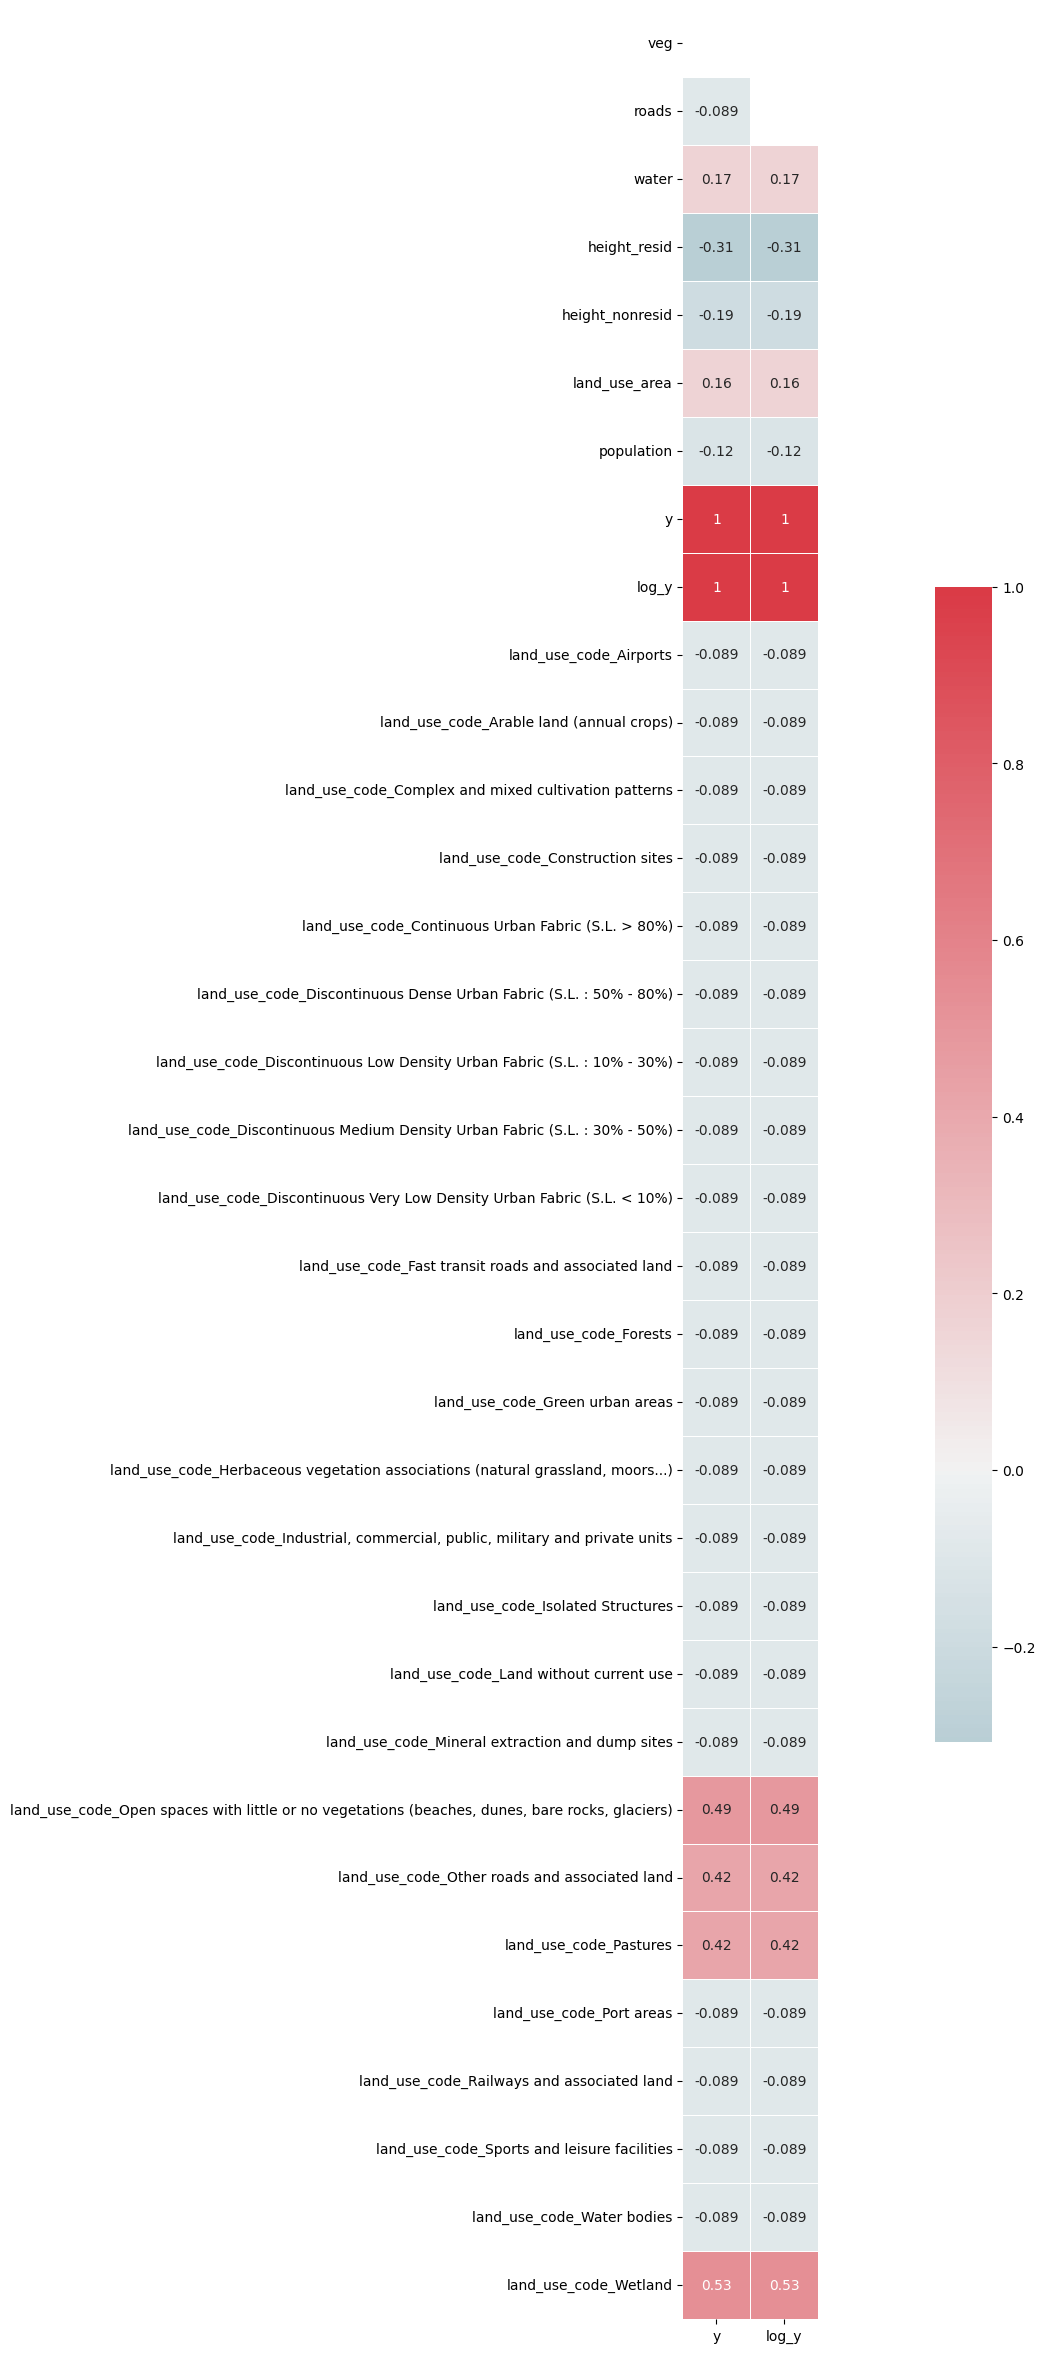

In [296]:
corr=data_group_geometry_hot.corr(method="spearman", min_periods=1)

